 Evaluación subjetiva de imágenes mejoradas usando Python, mostrando cada imagen con una zona ampliada o ROI (Region of Interest)


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from utils import *
import matplotlib.patches as patches




In [2]:


def mostrar_imagen_con_roi(imagen, roi, titulo, esquina_superior_izquierda, ancho, alto):
    """
    Muestra una imagen con una zona ampliada o ROI.

    Parámetros:
        imagen: La imagen a mostrar.
        roi: La zona ampliada (ROI).
        titulo: El título de la ventana.
        esquina_superior_izquierda: Una tupla (x, y) que representa las coordenadas de la esquina superior izquierda de la ROI.
        ancho: El ancho de la ROI.
        alto: El alto de la ROI.
    """
    # Crear una figura de Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en el primer eje
    axes[0].imshow(imagen, cmap='gray')
    axes[0].set_title(titulo)
    axes[0].axis('off')

    # Dibujar un rectángulo alrededor de la ROI en la imagen original
    rect = patches.Rectangle(esquina_superior_izquierda, ancho, alto, linewidth=1, edgecolor='r', facecolor='none')
    axes[0].add_patch(rect)

    # Mostrar la zona ampliada (ROI) en el segundo eje
    axes[1].imshow(roi, cmap='gray')
    axes[1].set_title('Zona ampliada')
    axes[1].axis('off')

    # Ajustar el layout de la figura
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [3]:
# Ruta de las imágenes
image_path = "E:/Panel_30W/P13/V24.2_I2.50_t30/JPEG_8"
background_path ="E:/Panel_30W/P13/V24.2_I2.50_t30/fondo_8/JPEG_fondo_8"
No_background_path = "E:/Panel_30W/Salida13/P8/dataset_noBG"
imagePP_path = "E:/Panel_30W/Salida13/P8bg"
image1_2Isc_path = "E:/Panel_30W/P13/V22.1_I0.9_t27.973/JPEG"
salidas_path = "D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/TestContraste"


datasetEL = read_images(image_path)
datasetBG = read_images(background_path)
#dataset_noBG = read_images(No_background_path)
#datasetPP = read_images(imagePP_path)

# Imprime el número de imágenes en cada dataset
# para probar que las imágenes se agregaron
print("Imágenes en el dataset EL: ", len(datasetEL))
print("Imágenes en el dataset BG: ", len(datasetBG))
#print("Imágenes en el dataset noBG: ", len(dataset_noBG))
#print("Imágenes en el dataset PP: ", len(datasetPP))

Imágenes en el dataset EL:  51
Imágenes en el dataset BG:  51


In [4]:
# Carga de imágenes original y mejorada
imagen_original = datasetEL[0]
imagen_mejorada = cv2.imread(os.path.join(salidas_path, "datasetMeanMaxMin", "MinContrastImage.jpg"), cv2.IMREAD_GRAYSCALE)

In [5]:
# Imprime las dimensiones de las imágenes
print("Dimensiones de la imagen original: ", imagen_original.shape)
print("Dimensiones de la imagen mejorada: ", imagen_mejorada.shape)

Dimensiones de la imagen original:  (512, 640)
Dimensiones de la imagen mejorada:  (512, 640)


In [5]:
# Define el tamaño del ROI (en píxeles)
roi_ancho = 128
roi_alto = 128

# Define la posición del ROI (en coordenadas x, y)
roi_x = 286
roi_y = 256

# Extrae la zona ampliada (ROI) de la imagen original
roi_original = imagen_original[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]

# Extrae la zona ampliada (ROI) de la imagen mejorada
roi_mejorada = imagen_mejorada[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]


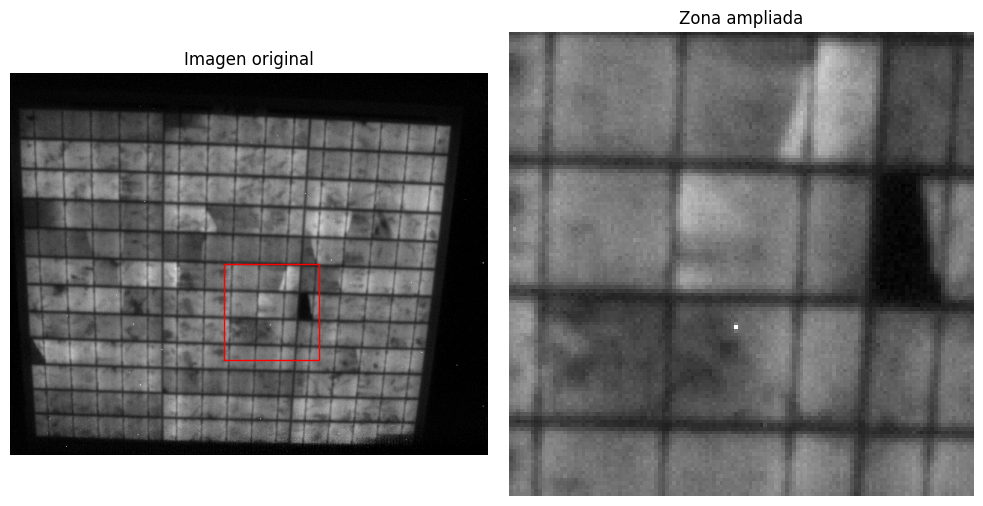

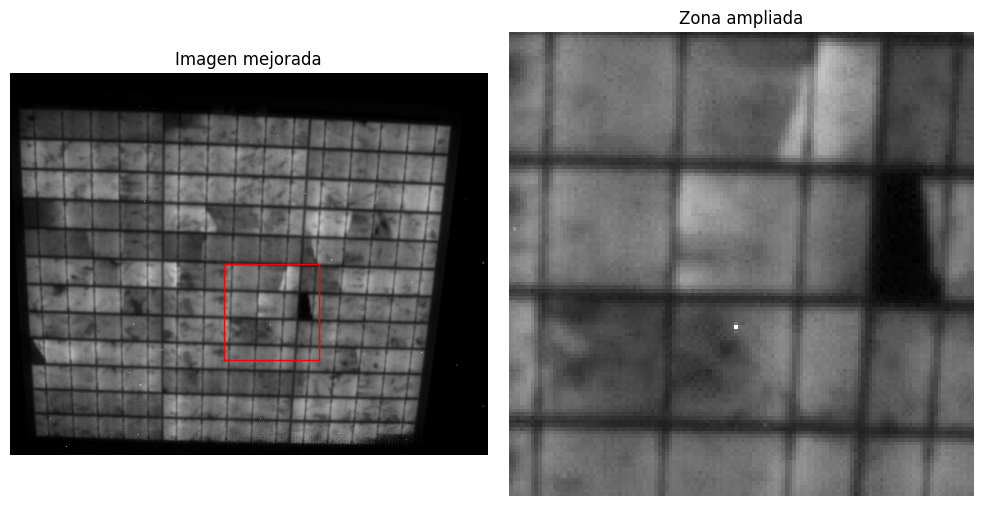

In [6]:
mostrar_imagen_con_roi(imagen_original, roi_original, 'Imagen original', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(imagen_mejorada, roi_mejorada, 'Imagen mejorada', (roi_x, roi_y), roi_ancho, roi_alto)